In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
! wc -l total_2022_m05_to_2023_m06_client_wifi_rev0.csv

32776198 total_2022_m05_to_2023_m06_client_wifi_rev0.csv


In [5]:
df = pd.read_csv('total_2022_m05_to_2023_m06_client_wifi_rev0.csv',parse_dates=['lastupdate']).drop_duplicates().drop(['geo_location','site_name_ssid'],axis=1)
df

,lastupdate,device_sha256,site_name_en
0,2022-05-22 14:42:35,9b3708025e7e1dcf07fa8139e7c5f0385ff585c507eb58...,In front of Chang Phueak Temple
1,2022-05-22 14:42:35,abdfc73c7bc0bd34860eb7522713fd5539f2208985f412...,In front of Chang Phueak Temple
2,2022-05-22 14:42:35,810fd3bfa5dc79deec7d62094b77d3a88b4aa24bc997e0...,In front of Chang Phueak Temple
3,2022-05-22 14:42:35,618677c38820f7664ed8ab8a6cbb985f1bedbb90bbcb5b...,In front of Chang Phueak Temple
4,2022-05-22 14:42:35,e0b5ee259937caa88705f891ae34149c61c8819e6520a6...,In front of Had Pathum Temple
...,...,...,...
32776192,2023-06-30 23:59:03,f1219972ddb2320ead4c86267ab578f752f11568341e88...,Sri Chiang Mai Community Health Park
32776193,2023-06-30 23:59:03,91a6dfa200fa9a2a13a3a7631c9d824f8c534c28de6a3a...,Sri Chiang Mai Community Health Park
32776194,2023-06-30 23:59:04,cf39d61de3ab8abe38e2fe620afa08114ade0ba4292496...,Boeng Wiang Courtyard
32776195,2023-06-30 23:59:04,f60b7029b03704e85c5f0f211dfc2eced2a6775d03be5f...,Boeng Wiang Courtyard


In [6]:
df.shape

(30566839, 3)

In [7]:
df.nunique()

lastupdate       2159752
device_sha256      16112
site_name_en          11
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30566839 entries, 0 to 32776196
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   lastupdate     datetime64[ns]
 1   device_sha256  object        
 2   site_name_en   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 932.8+ MB


In [7]:
df['year']=df.lastupdate.dt.year
df['month']=df.lastupdate.dt.month
df['month_name']=df.lastupdate.dt.month_name()
df['day_name']=df.lastupdate.dt.day_name()
df['hrs']=df.lastupdate.dt.hour

In [8]:
df['day_period']=df.hrs.map(lambda x: '00:00-02:59' if (x>=0 and x<3) 
                        else ('03:00-05:59' if(x>=3 and x<6) 
                        else ('06:00-08:59' if (x>=6 and x<9) 
                        else ('09:00-11:59' if(x>=9 and x<12) 
                        else ('12:00-14:59' if(x>=12 and x<15) 
                        else ('15:00-17:59' if(x>=15 and x<18) 
                        else ('18:00-20:59' if(x>=18 and x<20) 
                        else '21:00-23:59')))))))
# test=pd.DataFrame(df.day_period)
# tests

In [11]:
df.sample(20)

,lastupdate,device_sha256,site_name_en,year,month,month_name,day_name,hrs,day_period
11153869,2023-01-20 09:50:04,ce0d28d1d57de683faa14a0c69d77e25186e835378ad1b...,In front of Fresh Market,2023,1,January,Friday,9,09:00-11:59
28080292,2023-05-30 18:58:05,9e1e30873062e19089b8be681d951f1caa80b6683b0187...,In front of Fresh Market,2023,5,May,Tuesday,18,18:00-20:59
14170023,2023-02-20 16:07:03,1bf8a9bae9e401dae4b4c8dca5a10d3547677f3644c316...,Soi-19,2023,2,February,Monday,16,15:00-17:59
9203329,2022-12-12 13:43:09,bd183f471429c9f3b545a35ceec3018fb0b51c432475a9...,Sri Chiang Mai Community Health Park,2022,12,December,Monday,13,12:00-14:59
20621887,2023-04-08 12:30:07,38ad09b574d54bf2a6e9711e6b28bc73346581be7347e8...,Sri Chiang Mai Community Health Park,2023,4,April,Saturday,12,12:00-14:59
6270777,2022-09-30 00:58:02,9a41868953834478c554e0b10d4ce71aecc9e1aa3d8440...,Village Fund building,2022,9,September,Friday,0,00:00-02:59
25300901,2023-05-14 08:24:03,d596a364e391333a4b71793d28a28ce49c3e00c22e075d...,In front of Fresh Market,2023,5,May,Sunday,8,06:00-08:59
29748017,2023-06-12 04:54:03,46978b0c2ba88e75146e0a388f4690ff61f9c2ec52e493...,In front of Fresh Market,2023,6,June,Monday,4,03:00-05:59
14659454,2023-02-22 21:46:09,d2ec39c6593a642310af0a4935238f1067768926fe0f34...,Naga Courtyard,2023,2,February,Wednesday,21,21:00-23:59
10594669,2023-01-11 16:59:03,d1f4d9a20874038493740f3c92a133d5862c435d934906...,Soi-16,2023,1,January,Wednesday,16,15:00-17:59


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30566839 entries, 0 to 32776196
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   lastupdate     datetime64[ns]
 1   device_sha256  object        
 2   site_name_en   object        
 3   year           int64         
 4   month          int64         
 5   month_name     object        
 6   day_name       object        
 7   hrs            int64         
 8   day_period     object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.3+ GB


In [13]:
groupby_site_uniqMac_total = pd.DataFrame(df.groupby(by=['site_name_en'])['device_sha256'].value_counts().reset_index(name='counts'))
groupby_site_uniqMac_total

,site_name_en,device_sha256,counts
0,Boeng Wiang Courtyard,1f6e0e78c0a19531ee3468847f4396b5eb330f330beaa6...,26427
1,Boeng Wiang Courtyard,9333abce2d145cff006ec3c259ca6bb4ca4571db75d3bd...,21688
2,Boeng Wiang Courtyard,5b8e18e92d540f08cfbe16d237909a6c3dfe5129d1716d...,17760
3,Boeng Wiang Courtyard,b83629ca7dceff1fe31cd8eae671210ee6cc8c15296a76...,15987
4,Boeng Wiang Courtyard,ce386f2346c0b76c62eabd05e67c0352bfb2f8bfca1073...,15623
...,...,...,...
46366,Village Fund building,d7caa3b91f5b8d03d1878595326082373758b521ee48e2...,1
46367,Village Fund building,dfe93a9677b253cbda068f69be45e2ee481e34d348c643...,1
46368,Village Fund building,e00b94efb067067947817e8ccff6ee7fa5bc1999850c28...,1
46369,Village Fund building,ef1ae2b4e3710ad4959be0f70f1a44eab92873711cb3de...,1


In [14]:
groupby_site_uniqMac_total.nunique()

site_name_en        11
device_sha256    16112
counts            4286
dtype: int64

In [15]:
site_all_pieChart = groupby_site_uniqMac_total.groupby(by='site_name_en')['device_sha256'].count().reset_index(name='qty')
site_all_pieChart

,site_name_en,qty
0,Boeng Wiang Courtyard,7217
1,In front of Chang Phueak Temple,2339
2,In front of Fresh Market,6737
3,In front of Had Pathum Temple,6692
4,In front of Klang Temple,5557
5,Klong-soi-1 Bridge,441
6,Naga Courtyard,6922
7,Soi-16,1242
8,Soi-19,1041
9,Sri Chiang Mai Community Health Park,7590


In [16]:
site_all_pieChart.qty.sum()

46371

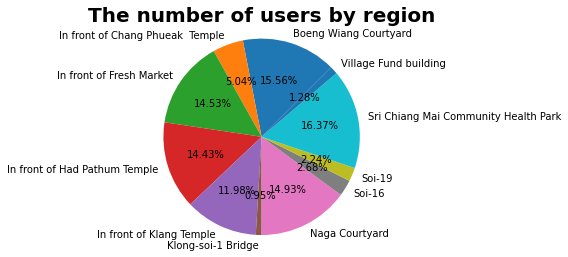

In [18]:
plt.pie(site_all_pieChart['qty'], labels=site_all_pieChart['site_name_en'], autopct='%1.2f%%', startangle=45, explode=[0,0,0,0,0,0,0,0,0,0,0])
plt.axis('equal')
plt.title('The number of users by region',fontsize=20,fontweight='bold')
plt.savefig('total_by_site.png')
plt.show()

In [19]:
groupby_site_month_uniqMac = pd.DataFrame(df.groupby(by=['site_name_en','year','month','month_name'])['device_sha256'].value_counts().reset_index(name='counts'))
groupby_site_month_uniqMac

,site_name_en,year,month,month_name,device_sha256,counts
0,Boeng Wiang Courtyard,2022,5,May,0885164286ef10b4297214f9ea22db6ee93d774360be5f...,1792
1,Boeng Wiang Courtyard,2022,5,May,1f6e0e78c0a19531ee3468847f4396b5eb330f330beaa6...,914
2,Boeng Wiang Courtyard,2022,5,May,26a1a6629c5317a02cef9c43fe26da4573225c80a6e600...,679
3,Boeng Wiang Courtyard,2022,5,May,c29bd33eb0277cb038df24f00e93ad26c254aaa7653125...,590
4,Boeng Wiang Courtyard,2022,5,May,2deecc2914ee38e8436520882ddee7e3a5a2862fc643f9...,449
...,...,...,...,...,...,...
113267,Village Fund building,2022,12,December,d8748896c5bfa6a35d77c7007db73cd721a283ec7061dd...,10
113268,Village Fund building,2022,12,December,fdcec9816fa6d7fae297197e395039ae1185e2ef7e4a7d...,10
113269,Village Fund building,2022,12,December,2bb575d4c80191618cf3a21df6b03cd68fadea7873f308...,9
113270,Village Fund building,2022,12,December,78941c0aab7e55006a78c54e6bf1ad4379dd29a7be94e1...,9


In [20]:
groupby_site_month_uniqMac.columns

Index(['site_name_en', 'year', 'month', 'month_name', 'device_sha256',
       'counts'],
      dtype='object')

In [41]:
groupby_site_month_uniqMac_pivot = pd.pivot_table(groupby_site_month_uniqMac,values='device_sha256',index='site_name_en',columns=['year','month','month_name'],aggfunc='count')#.reset_index()
groupby_site_month_uniqMac_pivot.fillna(0,inplace=True)
groupby_site_month_uniqMac_pivot

year                                    2022                                 \
month                                     5      6      7      8         9    
month_name                               May   June   July August September   
site_name_en                                                                  
Boeng Wiang Courtyard                  710.0  187.0  133.0  487.0     850.0   
In front of Chang Phueak  Temple       635.0  409.0  462.0  481.0     574.0   
In front of Fresh Market              1260.0  766.0  916.0  973.0    1313.0   
In front of Had Pathum Temple         1220.0  614.0  741.0  669.0    1072.0   
In front of Klang Temple               655.0  435.0  568.0  574.0     861.0   
Klong-soi-1 Bridge                      85.0   56.0   75.0   92.0      81.0   
Naga Courtyard                        1157.0  581.0  646.0  623.0     683.0   
Soi-16                                   0.0    0.0    0.0    0.0       0.0   
Soi-19                                   0.0    0.0    0.0    0.0       0.0   
Sri Chiang Mai Community Health Park  1080.0  582.0  750.0  697.0    1144.0   
Village Fund building                  136.0   64.0   90.0  141.0     169.0   

year                                                              2023  \
month                                     10       11       12      1    
month_name                           October November December January   
site_name_en                                                             
Boeng Wiang Courtyard                 1475.0    962.0   1080.0   941.0   
In front of Chang Phueak  Temple       619.0    573.0    401.0   383.0   
In front of Fresh Market              1354.0   1355.0   1517.0  1468.0   
In front of Had Pathum Temple         1551.0   1092.0   1261.0  1202.0   
In front of Klang Temple              1064.0   1006.0   1140.0  1062.0   
Klong-soi-1 Bridge                      97.0     93.0     92.0     0.0   
Naga Courtyard                        1419.0   1262.0   1423.0  1302.0   
Soi-16                                   0.0      0.0      0.0   488.0   
Soi-19                                   0.0      0.0      0.0   380.0   
Sri Chiang Mai Community Health Park  1353.0   1238.0   1390.0  1412.0   
Village Fund building                  139.0    103.0    102.0     0.0   

year                                                                           
month                                      2       3       4       5       6   
month_name                           February   March   April     May    June  
site_name_en                                                                   
Boeng Wiang Courtyard                  1475.0  1594.0  1624.0  1422.0  1270.0  
In front of Chang Phueak  Temple        489.0   535.0   433.0   463.0   440.0  
In front of Fresh Market               1482.0  1739.0  1822.0  1895.0  1904.0  
In front of Had Pathum Temple          1511.0  1477.0  1465.0  1375.0  1445.0  
In front of Klang Temple               1158.0  1370.0  1304.0  1434.0  1410.0  
Klong-soi-1 Bridge                        0.0     0.0     0.0     0.0     0.0  
Naga Courtyard                         1440.0  1514.0  1407.0  1457.0  1414.0  
Soi-16                                  475.0   526.0   487.0   503.0   493.0  
Soi-19                                  392.0   446.0   356.0   356.0   375.0  
Sri Chiang Mai Community Health Park   1532.0  1763.0  1720.0  1919.0  1865.0  
Village Fund building                     0.0     0.0     0.0     0.0     0.0

In [42]:
groupby_site_month_uniqMac_pivot.columns

MultiIndex([(2022,  5,       'May'),
            (2022,  6,      'June'),
            (2022,  7,      'July'),
            (2022,  8,    'August'),
            (2022,  9, 'September'),
            (2022, 10,   'October'),
            (2022, 11,  'November'),
            (2022, 12,  'December'),
            (2023,  1,   'January'),
            (2023,  2,  'February'),
            (2023,  3,     'March'),
            (2023,  4,     'April'),
            (2023,  5,       'May'),
            (2023,  6,      'June')],
           names=['year', 'month', 'month_name'])

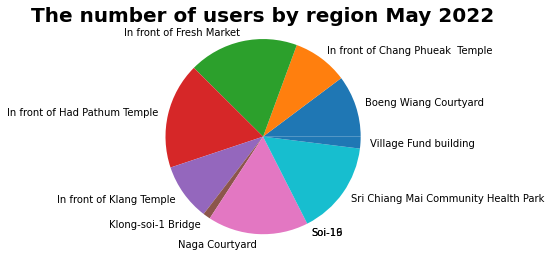

In [74]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,5,'May')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region May 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_may_2022.png')
plt.show()

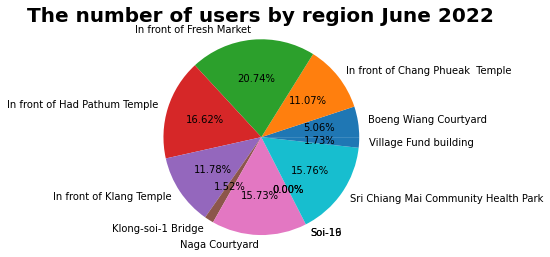

In [71]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,6,'June')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region June 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_jun_2022.png')
plt.show()

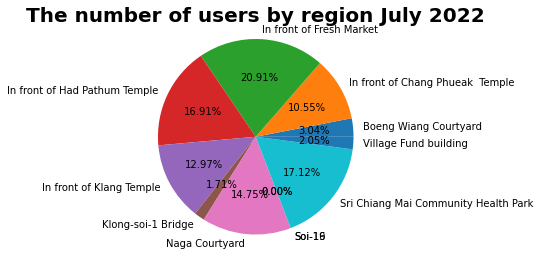

In [75]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,7,'July')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region July 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_jul_2022.png')
plt.show()

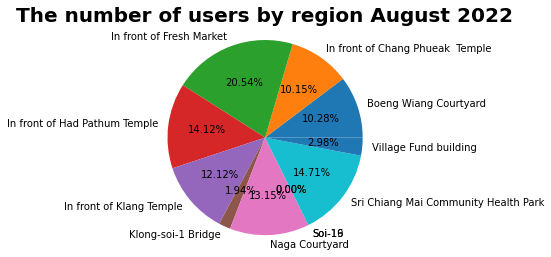

In [76]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,8,'August')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region August 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_aug_2022.png')
plt.show()

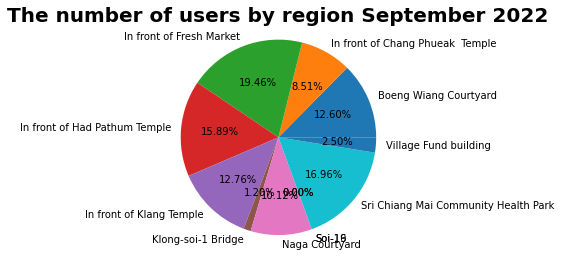

In [77]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,9,'September')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region September 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_sep_2022.png')
plt.show()

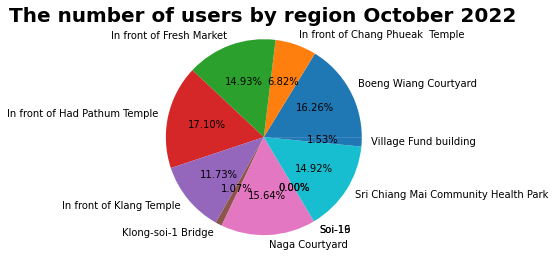

In [78]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,10,'October')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region October 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_oct_2022.png')
plt.show()

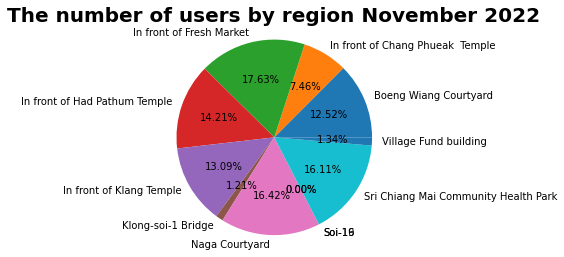

In [79]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,11,'November')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region November 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_nov_2022.png')
plt.show()

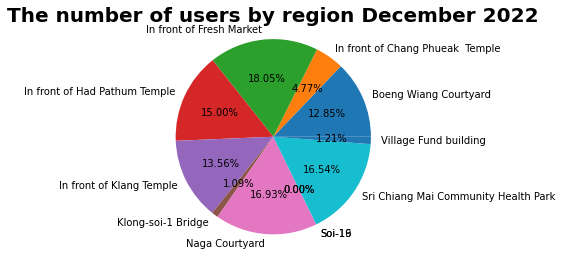

In [82]:
plt.pie(groupby_site_month_uniqMac_pivot[(2022,12,'December')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region December 2022',fontsize=20,fontweight='bold')
plt.savefig('by_site_dec_2022.png')
plt.show()

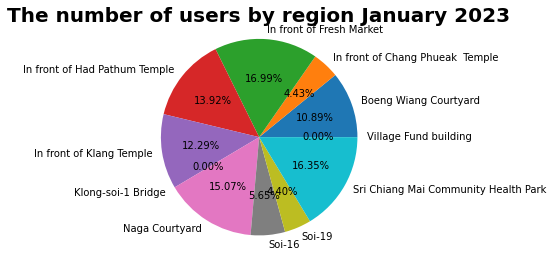

In [83]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,1,'January')],labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region January 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_jan_2023.png')
plt.show()

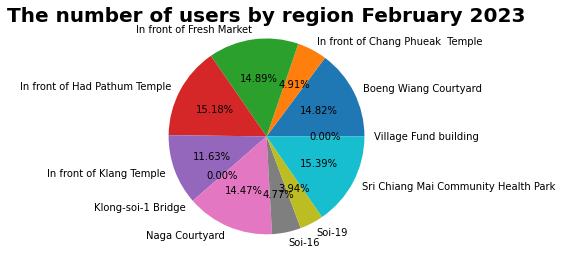

In [84]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,2,'February')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region February 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_feb_2023.png')
plt.show()

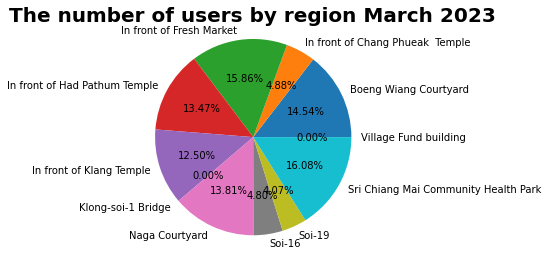

In [85]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,3,'March')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region March 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_mar_2023.png')
plt.show()

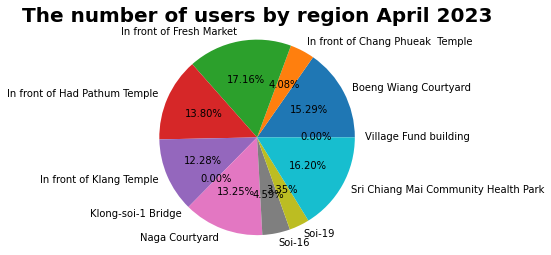

In [86]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,4,'April')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region April 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_apr_2023.png')
plt.show()

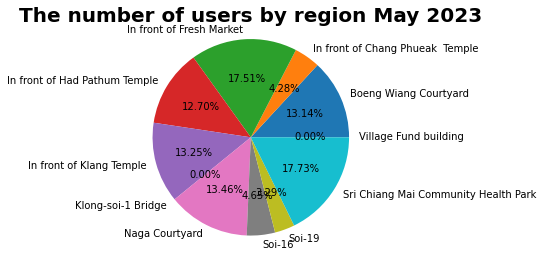

In [87]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,5,'May')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region May 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_may_2023.png')
plt.show()

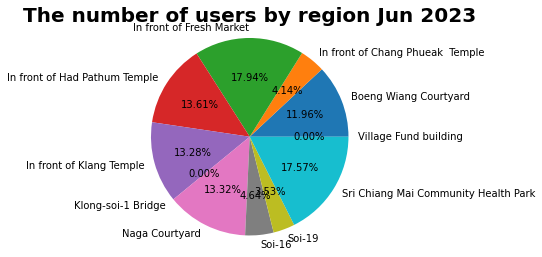

In [88]:
plt.pie(groupby_site_month_uniqMac_pivot[(2023,6,'June')], labels=groupby_site_month_uniqMac_pivot.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('The number of users by region Jun 2023',fontsize=20,fontweight='bold')
plt.savefig('by_site_jun_2023.png')
plt.show()

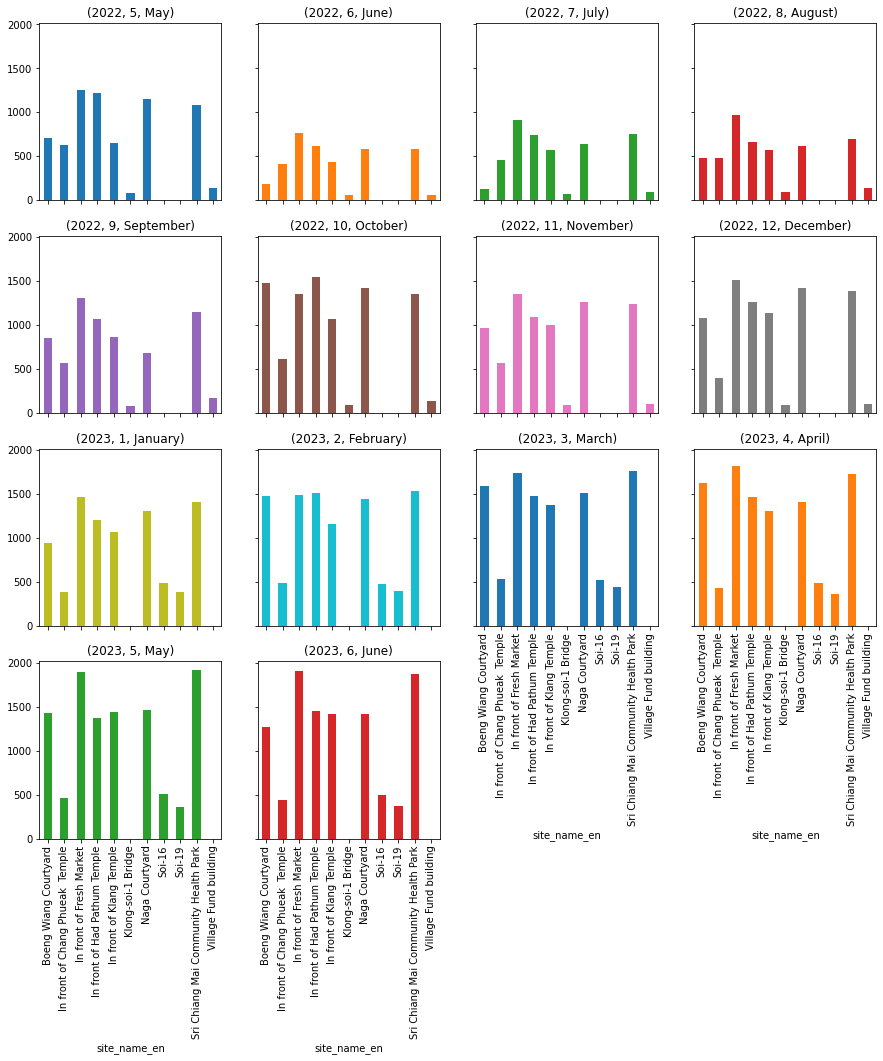

In [89]:
groupby_site_month_uniqMac_pivot2.plot(kind='bar',subplots=True, layout=(4, 4), figsize=(15,15),sharex=True,sharey=True,legend=False)
plt.savefig('by_site_sunplot.png');

In [9]:
groupby_year_month_uniqMac = pd.DataFrame(df.groupby(by=['year','month','month_name'])['device_sha256'].value_counts().reset_index(name='counts'))
groupby_year_month_uniqMac

,year,month,month_name,device_sha256,counts
0,2022,5,May,0885164286ef10b4297214f9ea22db6ee93d774360be5f...,7028
1,2022,5,May,c29bd33eb0277cb038df24f00e93ad26c254aaa7653125...,5248
2,2022,5,May,91c35d38d23a9243734c17536c514862f918440e835497...,4769
3,2022,5,May,f93afe52caad4e479530f1ce3813c205b9434c951149c4...,4757
4,2022,5,May,26a1a6629c5317a02cef9c43fe26da4573225c80a6e600...,4713
...,...,...,...,...,...
38905,2023,6,June,fae80c8905e0681c027cea552f5e0e575d276c3b68690c...,8
38906,2023,6,June,779895cdaf60234eb5db34c8420b28bde825599f2616d7...,6
38907,2023,6,June,c312ee714536fda9664863c80f1af16204314ebc7bede8...,6
38908,2023,6,June,aaded490fdecb72251a2de9305636f8a57d326f7ea2dc8...,5


In [10]:
groupby_year_month_uniqMac['counts'].sum()

30566839

In [11]:
groupby_year_month_uniqMac.columns

Index(['year', 'month', 'month_name', 'device_sha256', 'counts'], dtype='object')

In [12]:
del groupby_year_month_uniqMac['counts']

In [13]:
groupby_year_month_uniqMac.columns

Index(['year', 'month', 'month_name', 'device_sha256'], dtype='object')

In [14]:
year_month_uniqMac = pd.DataFrame(groupby_year_month_uniqMac.groupby(by=['year','month','month_name'])['device_sha256'].value_counts().reset_index(name='qty'))
year_month_uniqMac

,year,month,month_name,device_sha256,qty
0,2022,5,May,0021608d1836554012bf995c10c8d95a863ba750eabc79...,1
1,2022,5,May,002cb581d3b8c22c9f72af79953e5915e3361c6b59116e...,1
2,2022,5,May,00558900357cf1938d38132edc2ba36b0247ee76efc547...,1
3,2022,5,May,006efcc3efb00da219f96e051fd12e82fe083f17f6a0a9...,1
4,2022,5,May,0084b400676f4deeac10f32b045dbb1decf30a076bfe99...,1
...,...,...,...,...,...
38905,2023,6,June,ff414003cdddb5011e3bbdc8ea84cc08d0b614715b9d22...,1
38906,2023,6,June,ff517edecf38d85dfd942b52f13ea757b57bccc4791b6f...,1
38907,2023,6,June,ff7e4caabe77b206923d5be775db0c896d06bac8457ea0...,1
38908,2023,6,June,ffcaf93c4802a1d247ed231888abd101964e75748aae6c...,1


In [15]:
for_chart = pd.DataFrame(year_month_uniqMac[['year','month','month_name']].value_counts().reset_index(name='qty'))
for_chart.sort_values(['year','month','month_name'],inplace=True)
for_chart['year'] = for_chart['year'].apply(str)
for_chart['month_year'] = for_chart['month_name']+' '+for_chart['year']
for_chart.set_index('month_year',inplace=True)
for_chart

,year,month,month_name,qty
month_year,,,,
May 2022,2022,5,May,2371
June 2022,2022,6,June,1223
July 2022,2022,7,July,1466
August 2022,2022,8,August,1446
September 2022,2022,9,September,2312
October 2022,2022,10,October,3281
November 2022,2022,11,November,2817
December 2022,2022,12,December,2855
January 2023,2023,1,January,2891


In [16]:
for_matplot_line=for_chart.drop(['year','month','month_name'],axis=1)

In [17]:
type(for_chart)

pandas.core.frame.DataFrame

In [18]:
for_chart.index

Index(['May 2022', 'June 2022', 'July 2022', 'August 2022', 'September 2022',
       'October 2022', 'November 2022', 'December 2022', 'January 2023',
       'February 2023', 'March 2023', 'April 2023', 'May 2023', 'June 2023'],
      dtype='object', name='month_year')

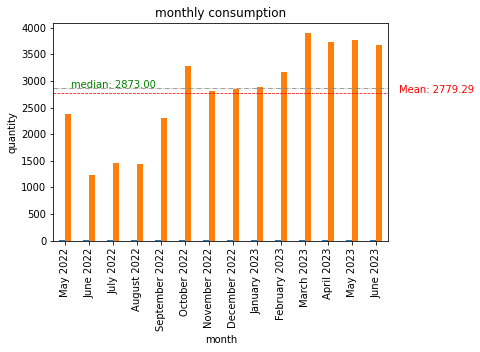

In [19]:
line_g = for_chart.plot(kind='bar',legend=False,title='monthly consumption')
mean_value = for_chart['qty'].mean()
median_value = for_chart['qty'].median()
plt.xticks(rotation=90)
plt.xlabel('month')
plt.ylabel('quantity')
# plt.axhline(for_chart['qty'].mean(), color='green', linestyle='--',linewidth=0.75)
plt.axhline(mean_value, color='red', linestyle='--',linewidth=0.75)
plt.axhline(median_value, color='gray', linestyle='-.',linewidth=0.75)
plt.savefig('by_month_bar.png')
plt.text(len(for_chart)+1.5, mean_value, f'Mean: {mean_value:.2f}', color='red', ha='center')
plt.text(len(for_chart)-12, median_value, f'median: {median_value:.2f}', color='green', ha='center')
line_g;

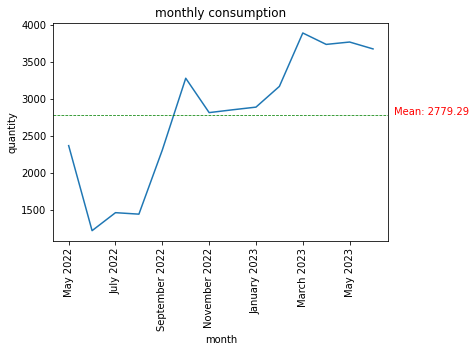

In [20]:
line_g = for_matplot_line.plot(kind='line',legend=False,title='monthly consumption')
mean_value = for_matplot_line['qty'].mean()
plt.xticks(rotation=90)
plt.axhline(for_matplot_line['qty'].mean(), color='green', linestyle='--',linewidth=0.75)
plt.xlabel('month')
plt.ylabel('quantity')
plt.savefig('by_month_line_plt.png')
plt.text(len(for_chart)+1.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
line_g;

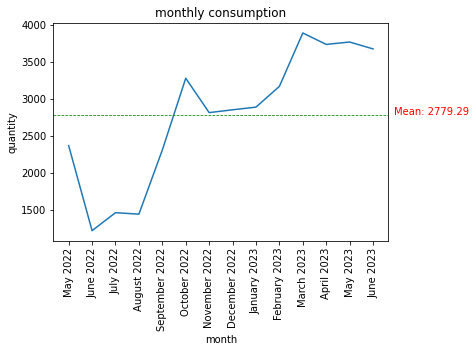

In [21]:
sns.lineplot(x='month_year', y='qty', data=for_chart)#, estimator='mean'
mean_value = for_chart['qty'].mean()
plt.xticks(rotation=90)
plt.axhline(for_chart['qty'].mean(), color='green', linestyle='--',linewidth=0.75)
plt.xlabel('month')
plt.ylabel('quantity')
plt.title('monthly consumption')
plt.text(len(for_chart)+1.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
plt.savefig('by_month_line_sns.png');

In [22]:
site_month = pd.DataFrame(df.groupby(by=['site_name_en','year','month','month_name'])['device_sha256'].value_counts().reset_index(name='qty'))
site_month

,site_name_en,year,month,month_name,device_sha256,qty
0,Boeng Wiang Courtyard,2022,5,May,0885164286ef10b4297214f9ea22db6ee93d774360be5f...,1792
1,Boeng Wiang Courtyard,2022,5,May,1f6e0e78c0a19531ee3468847f4396b5eb330f330beaa6...,914
2,Boeng Wiang Courtyard,2022,5,May,26a1a6629c5317a02cef9c43fe26da4573225c80a6e600...,679
3,Boeng Wiang Courtyard,2022,5,May,c29bd33eb0277cb038df24f00e93ad26c254aaa7653125...,590
4,Boeng Wiang Courtyard,2022,5,May,2deecc2914ee38e8436520882ddee7e3a5a2862fc643f9...,449
...,...,...,...,...,...,...
113267,Village Fund building,2022,12,December,d8748896c5bfa6a35d77c7007db73cd721a283ec7061dd...,10
113268,Village Fund building,2022,12,December,fdcec9816fa6d7fae297197e395039ae1185e2ef7e4a7d...,10
113269,Village Fund building,2022,12,December,2bb575d4c80191618cf3a21df6b03cd68fadea7873f308...,9
113270,Village Fund building,2022,12,December,78941c0aab7e55006a78c54e6bf1ad4379dd29a7be94e1...,9


In [23]:
site_month_pivot = pd.pivot_table(site_month,values='device_sha256',index=['year','month','month_name'],columns='site_name_en',aggfunc='count')#,margins=True)
site_month_pivot

site_name_en           Boeng Wiang Courtyard  \
year month month_name                          
2022 5     May                         710.0   
     6     June                        187.0   
     7     July                        133.0   
     8     August                      487.0   
     9     September                   850.0   
     10    October                    1475.0   
     11    November                    962.0   
     12    December                   1080.0   
2023 1     January                     941.0   
     2     February                   1475.0   
     3     March                      1594.0   
     4     April                      1624.0   
     5     May                        1422.0   
     6     June                       1270.0   

site_name_en           In front of Chang Phueak  Temple  \
year month month_name                                     
2022 5     May                                    635.0   
     6     June                                   409.0   
     7     July                                   462.0   
     8     August                                 481.0   
     9     September                              574.0   
     10    October                                619.0   
     11    November                               573.0   
     12    December                               401.0   
2023 1     January                                383.0   
     2     February                               489.0   
     3     March                                  535.0   
     4     April                                  433.0   
     5     May                                    463.0   
     6     June                                   440.0   

site_name_en           In front of Fresh Market  \
year month month_name                             
2022 5     May                           1260.0   
     6     June                           766.0   
     7     July                           916.0   
     8     August                         973.0   
     9     September                     1313.0   
     10    October                       1354.0   
     11    November                      1355.0   
     12    December                      1517.0   
2023 1     January                       1468.0   
     2     February                      1482.0   
     3     March                         1739.0   
     4     April                         1822.0   
     5     May                           1895.0   
     6     June                          1904.0   

site_name_en           In front of Had Pathum Temple  \
year month month_name                                  
2022 5     May                                1220.0   
     6     June                                614.0   
     7     July                                741.0   
     8     August                              669.0   
     9     September                          1072.0   
     10    October                            1551.0   
     11    November                           1092.0   
     12    December                           1261.0   
2023 1     January                            1202.0   
     2     February                           1511.0   
     3     March                              1477.0   
     4     April                              1465.0   
     5     May                                1375.0   
     6     June                               1445.0   

site_name_en           In front of Klang Temple  Klong-soi-1 Bridge  \
year month month_name                                                 
2022 5     May                            655.0                85.0   
     6     June                           435.0                56.0   
     7     July                           568.0                75.0   
     8     August                         574.0                92.0   
     9     September                      861.0                81.0   
     10    October                       1064.0                97.0   
    

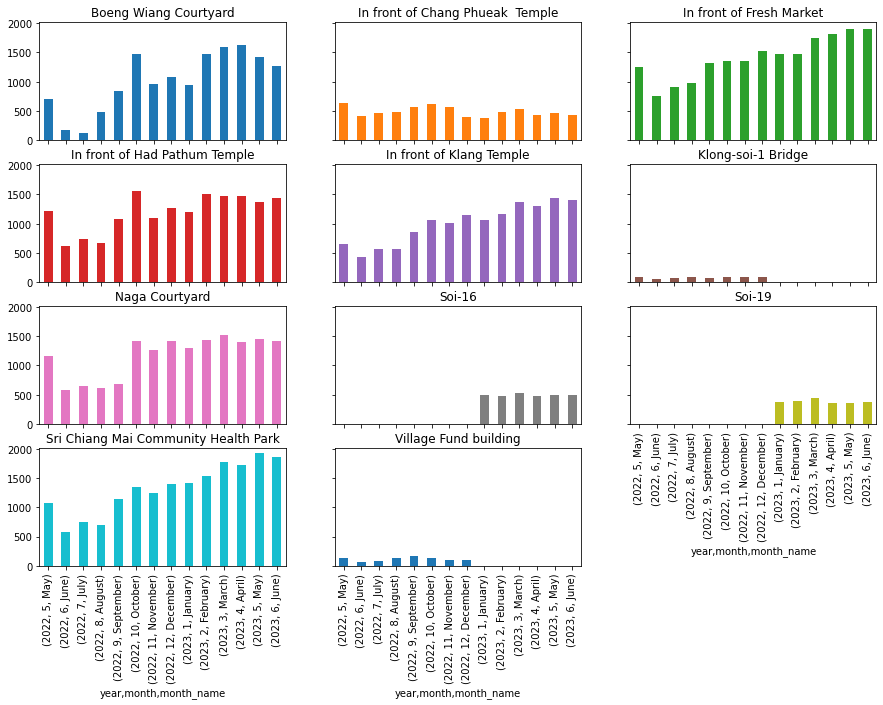

In [25]:
site_month_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(15,10),sharex=True,sharey=True,legend=False)
plt.savefig('by_month_site_subplt.png');

In [26]:
site_day = pd.DataFrame(df.groupby(by=['site_name_en','day_name'])['device_sha256'].value_counts().reset_index(name='qty'))
site_day

,site_name_en,day_name,device_sha256,qty
0,Boeng Wiang Courtyard,Friday,1f6e0e78c0a19531ee3468847f4396b5eb330f330beaa6...,4714
1,Boeng Wiang Courtyard,Friday,5a80d79c1665aca87cc7571416a1f535566a1554910a02...,4401
2,Boeng Wiang Courtyard,Friday,9333abce2d145cff006ec3c259ca6bb4ca4571db75d3bd...,3132
3,Boeng Wiang Courtyard,Friday,3fe3864186f55bc9748c80fa76f05de72b5251a3456c63...,3082
4,Boeng Wiang Courtyard,Friday,5b8e18e92d540f08cfbe16d237909a6c3dfe5129d1716d...,2755
...,...,...,...,...
135176,Village Fund building,Wednesday,c1b1372b3ea96b28f932cb055dd3c3b2aad9056202d26d...,13
135177,Village Fund building,Wednesday,c8b420114f1094e83c37652b371ffd82f5240953b314b3...,13
135178,Village Fund building,Wednesday,7590c1d30284d7da780083fc71da9cb3249a8894141350...,12
135179,Village Fund building,Wednesday,28f3631a931c9a55f2e7d8bea22b91864ba8d1f4dae180...,9


In [27]:
site_day_all = pd.DataFrame(df.groupby(by=['day_name'])['device_sha256'].count().reset_index(name='qty'))
site_day_all

,day_name,qty
0,Friday,5049143
1,Monday,4203237
2,Saturday,4377259
3,Sunday,3807049
4,Thursday,4598695
5,Tuesday,4201503
6,Wednesday,4329953


In [28]:
site_day_all['day_name'] = pd.Categorical(site_day_all['day_name'],
                                                         categories=['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
site_day_all.sort_values(by='day_name',inplace=True)
site_day_all

,day_name,qty
3,Sunday,3807049
1,Monday,4203237
5,Tuesday,4201503
6,Wednesday,4329953
4,Thursday,4598695
0,Friday,5049143
2,Saturday,4377259


In [29]:
# day_all_sorted = site_day_all.sort_values(by='day_name')
# day_all_sorted

In [30]:
site_day_all.set_index('day_name',inplace=True)
site_day_all

,qty
day_name,
Sunday,3807049
Monday,4203237
Tuesday,4201503
Wednesday,4329953
Thursday,4598695
Friday,5049143
Saturday,4377259


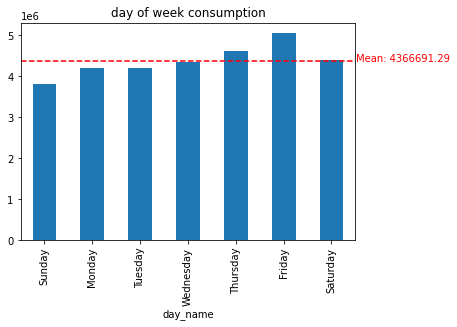

In [31]:
ax=site_day_all.plot(kind='bar',legend=False,title='day of week consumption')
mean_value = site_day_all['qty'].mean()
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(len(site_day_all)+0.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
plt.savefig('by_weekday_bar.png')
plt.show();

In [32]:
site_day_pivot = pd.pivot_table(site_day,values='device_sha256',index=['day_name'],columns='site_name_en',aggfunc='count',sort=False).reset_index()
site_day_pivot

site_name_en,day_name,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
0,Friday,2674,978,3454,3173,2511,133,3000,627,454,3372,174
1,Monday,2081,988,3309,2607,2355,105,2662,560,426,3010,147
2,Saturday,2590,936,3312,3109,2433,153,2974,583,430,3103,192
3,Sunday,2477,1271,3887,3072,2508,156,3167,497,371,3487,246
4,Thursday,2392,954,3246,2772,2331,102,2705,599,458,3086,128
5,Tuesday,2123,1026,3220,2643,2314,107,2582,525,409,2960,143
6,Wednesday,2363,974,3221,2705,2279,98,2724,578,431,3099,130


In [33]:
site_day_pivot.columns

Index(['day_name', 'Boeng Wiang Courtyard', 'In front of Chang Phueak  Temple',
       'In front of Fresh Market', 'In front of Had Pathum Temple',
       'In front of Klang Temple', 'Klong-soi-1 Bridge', 'Naga Courtyard',
       'Soi-16', 'Soi-19', 'Sri Chiang Mai Community Health Park',
       'Village Fund building'],
      dtype='object', name='site_name_en')

In [34]:
site_day_pivot['day_name'] = pd.Categorical(site_day_pivot['day_name'],
                                                         categories=['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
site_day_pivot.sort_values(by='day_name',inplace=True)
site_day_pivot.set_index('day_name',inplace=True)
site_day_pivot

site_name_en,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
day_name,,,,,,,,,,,
Sunday,2477,1271,3887,3072,2508,156,3167,497,371,3487,246
Monday,2081,988,3309,2607,2355,105,2662,560,426,3010,147
Tuesday,2123,1026,3220,2643,2314,107,2582,525,409,2960,143
Wednesday,2363,974,3221,2705,2279,98,2724,578,431,3099,130
Thursday,2392,954,3246,2772,2331,102,2705,599,458,3086,128
Friday,2674,978,3454,3173,2511,133,3000,627,454,3372,174
Saturday,2590,936,3312,3109,2433,153,2974,583,430,3103,192


In [35]:
# site_day_pivot2 = pd.pivot_table(site_day,values='device_sha256',index=['day_name'],columns='site_name_en',aggfunc='count',sort=False)
# site_day_pivot2

In [36]:
# site_day_pivot2.sort_index()

In [37]:
# site_day_pivot2.index = pd.Categorical(site_day_pivot2.index,
#                                                          categories=['Sunday','Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
# site_day_pivot.index
# # site_day_pivot

In [38]:
site_day_pivot.index

CategoricalIndex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                  'Friday', 'Saturday'],
                 categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True, dtype='category', name='day_name')

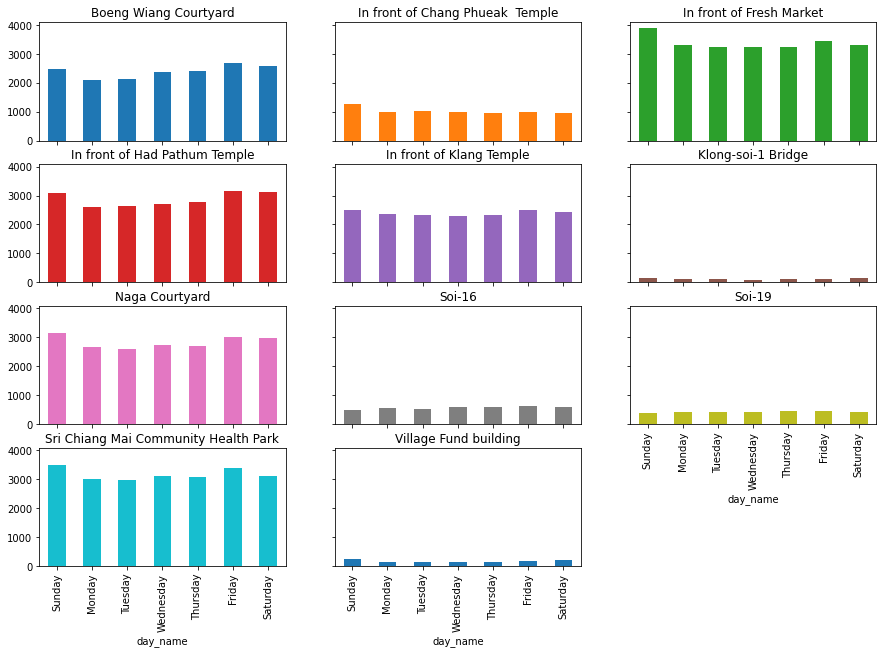

In [40]:
# site_day_pivot.set_index('day_name')
site_day_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(15,10),sharex=True,sharey=True,legend=False)
plt.savefig('by_weekday_site.png');

In [41]:
day_period_uniqMac = pd.DataFrame(df.groupby(by=['day_period'])['device_sha256'].value_counts().reset_index(name='counts'))#.set_index('day_period').sort_index
day_period_uniqMac

,day_period,device_sha256,counts
0,00:00-02:59,b99f50b4cc2a6eb99323c03030b83b81c97ab605a3ac45...,36646
1,00:00-02:59,67e71d636de9398c708669ce76c0c11a4fb066d4973257...,33284
2,00:00-02:59,115f9a735cb315174a0d6a3b05438822e5b6d7a9fefffe...,20317
3,00:00-02:59,b95990739fdaed904b9c6a2a17947023be82a19dc025a8...,17216
4,00:00-02:59,51acd17c78b47c0faae596b2be8a6c64b8a91db0c3b137...,15224
...,...,...,...
47136,21:00-23:59,b6d699fbab13a3792a4e536fcde78861cd296c15fae61d...,1
47137,21:00-23:59,d177b38018d4a0ee321a6c32d31a72c2376cc701dbd940...,1
47138,21:00-23:59,dafa8f24a0376e40d895a52cb71358fdafa7b649b8b126...,1
47139,21:00-23:59,eba05299776e140210637df06334929042032c33367930...,1


In [42]:
day_period_total = pd.DataFrame(day_period_uniqMac.groupby('day_period').count()['device_sha256'])
# day_period_total = pd.DataFrame(groupby_day_period_uniqMac.groupby(by='day_period')['device_sha256'].value_counts())
day_period_total

,device_sha256
day_period,
00:00-02:59,2369
03:00-05:59,1397
06:00-08:59,4357
09:00-11:59,5938
12:00-14:59,7287
15:00-17:59,8120
18:00-20:59,9162
21:00-23:59,8511


In [43]:
day_period_total.device_sha256.sum()

47141

In [44]:
# # day_period_total = pd.DataFrame(groupby_day_period_uniqMac.groupby('day_period').count()['device_sha256'])
# day_period_total = pd.DataFrame(day_period_uniqMac.groupby(by='day_period')['device_sha256'].value_counts())
# day_period_total

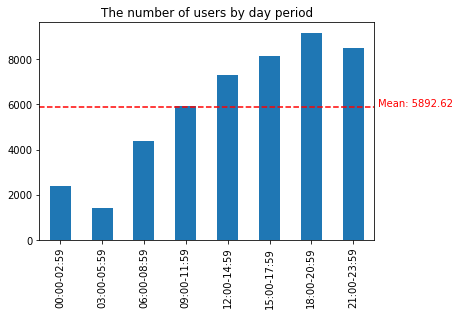

In [45]:
ax=day_period_total.plot(kind='bar',legend=False,xlabel='',title='The number of users by day period')
mean_value = day_period_total['device_sha256'].mean()
ax.axhline(mean_value, color='red', linestyle='--', label='Mean')
plt.text(len(day_period_total)+0.5, mean_value, f'Mean: {mean_value:.2f}', color='r', ha='center')
plt.savefig('by_day.png')
plt.show();

In [46]:
day_period_uniqMac_site = pd.DataFrame(df.groupby(by=['day_period','site_name_en'])['device_sha256'].value_counts().reset_index(name='counts'))#.set_index('day_period').sort_index
day_period_uniqMac_site

,day_period,site_name_en,device_sha256,counts
0,00:00-02:59,Boeng Wiang Courtyard,115f9a735cb315174a0d6a3b05438822e5b6d7a9fefffe...,2945
1,00:00-02:59,Boeng Wiang Courtyard,02ea98e490675f72a2b7e470be57f403ea5859a67ade26...,2781
2,00:00-02:59,Boeng Wiang Courtyard,5a80d79c1665aca87cc7571416a1f535566a1554910a02...,2325
3,00:00-02:59,Boeng Wiang Courtyard,51acd17c78b47c0faae596b2be8a6c64b8a91db0c3b137...,2080
4,00:00-02:59,Boeng Wiang Courtyard,e6ed8d05e94872cff44c9c74946860ef5822e99f89b9ba...,1940
...,...,...,...,...
134669,21:00-23:59,Village Fund building,384a6ad52f59277e357f2eadb47948e2c6281eb304498e...,5
134670,21:00-23:59,Village Fund building,0233af6aa7d8c70965122fdf345ad3e23dbf54d436de4c...,4
134671,21:00-23:59,Village Fund building,4ba2e04c24f7e1ca118204131601c16566e614e3a067c8...,2
134672,21:00-23:59,Village Fund building,8b4ad27b501f0dbe3521207ad7548d5eedf1e2e0ef2531...,1


In [47]:
day_period_uniqMac_site_pivot = pd.pivot_table(day_period_uniqMac_site,values='device_sha256',index='day_period',columns=['site_name_en'],aggfunc='count')
day_period_uniqMac_site_pivot

site_name_en,Boeng Wiang Courtyard,In front of Chang Phueak Temple,In front of Fresh Market,In front of Had Pathum Temple,In front of Klang Temple,Klong-soi-1 Bridge,Naga Courtyard,Soi-16,Soi-19,Sri Chiang Mai Community Health Park,Village Fund building
day_period,,,,,,,,,,,
00:00-02:59,885,333,969,1000,762,19,877,197,130,966,78
03:00-05:59,256,145,780,318,353,8,321,92,68,416,19
06:00-08:59,1084,653,2717,1336,1334,72,1315,358,275,1748,67
09:00-11:59,1942,1036,3583,2377,2150,93,2253,553,396,2537,96
12:00-14:59,2547,1387,4166,3163,2580,139,3152,585,423,3186,182
15:00-17:59,3245,1344,4477,3747,3126,220,3710,665,538,3909,254
18:00-20:59,3869,1142,3767,3960,3278,173,3930,748,626,4632,271
21:00-23:59,3630,1065,3041,3960,2976,100,3802,709,580,4469,234


In [48]:
day_period_uniqMac_site_pivot.sum(axis=1)

day_period
00:00-02:59     6216
03:00-05:59     2776
06:00-08:59    10959
09:00-11:59    17016
12:00-14:59    21510
15:00-17:59    25235
18:00-20:59    26396
21:00-23:59    24566
dtype: int64

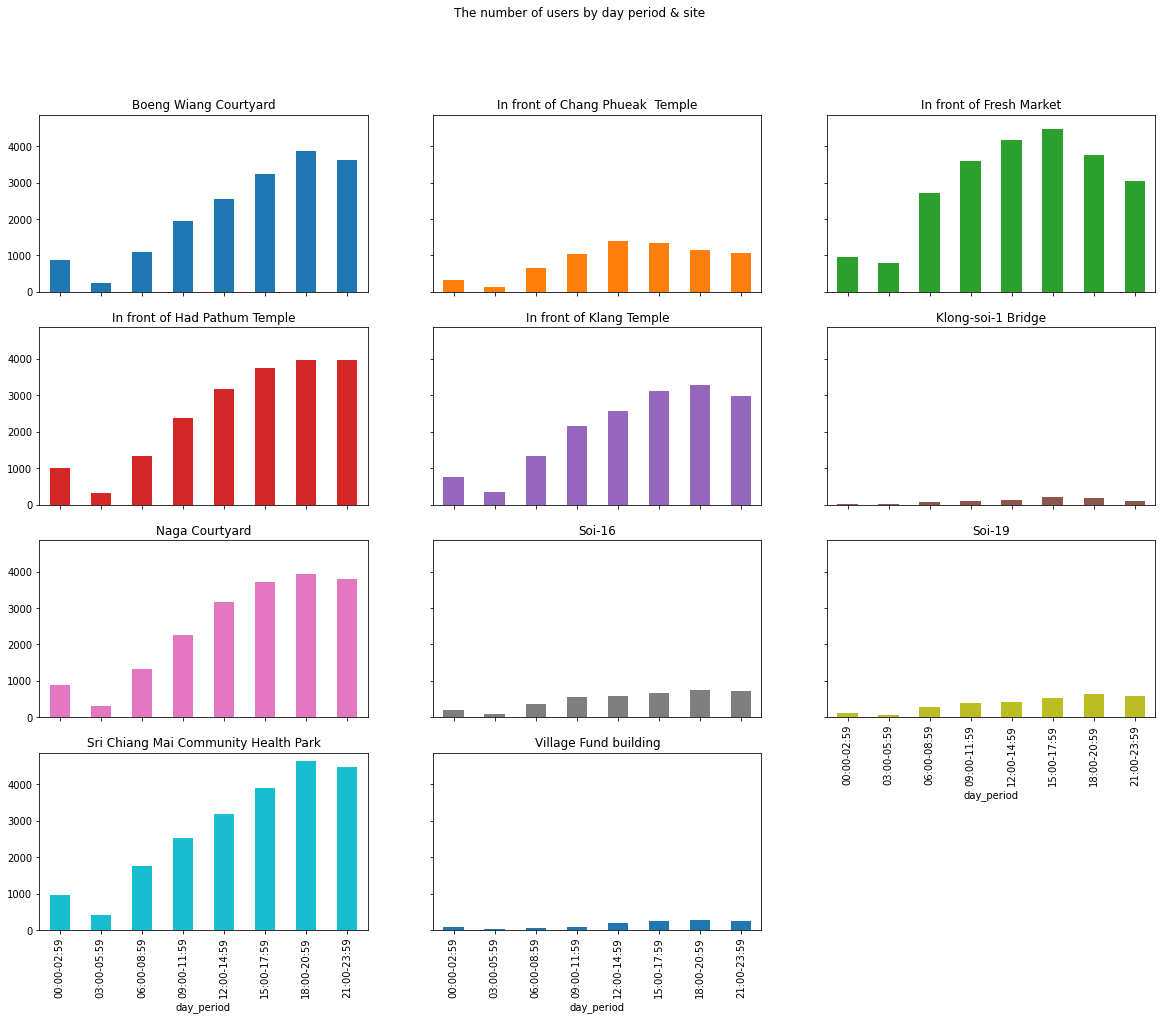

In [49]:
day_period_uniqMac_site_pivot.plot(kind='bar',subplots=True, layout=(4, 3), figsize=(20,15),sharex=True,sharey=True,legend=False,title='The number of users by day period & site')
plt.savefig('by_day_period_site_subplt.png');

In [50]:
day_period_uniqMac_month = pd.DataFrame(df.groupby(by=['day_period','year','month','month_name'])['device_sha256'].value_counts().reset_index(name='counts'))#.set_index('day_period').sort_index
day_period_uniqMac_month

,day_period,year,month,month_name,device_sha256,counts
0,00:00-02:59,2022,5,May,0885164286ef10b4297214f9ea22db6ee93d774360be5f...,1224
1,00:00-02:59,2022,5,May,f93afe52caad4e479530f1ce3813c205b9434c951149c4...,966
2,00:00-02:59,2022,5,May,26a1a6629c5317a02cef9c43fe26da4573225c80a6e600...,663
3,00:00-02:59,2022,5,May,cd9eaca5d5e6a1b18715736ad6833c433001770aab8812...,531
4,00:00-02:59,2022,5,May,270ff3c09395d7695dc3d164c89915dd039caeaee129ef...,502
...,...,...,...,...,...,...
116507,21:00-23:59,2023,6,June,32a1bea629ce0389597ec23873cf6e8b223585d937881b...,1
116508,21:00-23:59,2023,6,June,59995657855503762489170d491fe3cdb017a83176560f...,1
116509,21:00-23:59,2023,6,June,9840a20c4870c31bf89bd979e1a003fc8b6bc48681ac49...,1
116510,21:00-23:59,2023,6,June,9bd58b18cc6e4f7e679baf3ac0588486d03ee74e95444c...,1


In [51]:
day_period_uniqMac_month_pivot = pd.pivot_table(day_period_uniqMac_month,values='device_sha256',index='day_period',columns=['year','month','month_name'],aggfunc='count')
day_period_uniqMac_month_pivot

year         2022                                                       \
month          5    6    7      8         9       10       11       12   
month_name    May June July August September October November December   
day_period                                                               
00:00-02:59   179  129  153    191       230     525      312      273   
03:00-05:59    53   82  101    122       168     259      222      215   
06:00-08:59   218  404  459    463       708     812      892      869   
09:00-11:59   315  538  645    693       991    1253     1144     1177   
12:00-14:59  1489  590  689    734      1101    1511     1247     1329   
15:00-17:59  1441  676  820    844      1324    1662     1500     1547   
18:00-20:59   573  700  892    894      1332    1833     1569     1631   
21:00-23:59   694  638  728    726      1038    1705     1340     1349   

year           2023                                   
month            1        2     3     4     5     6   
month_name  January February March April   May  June  
day_period                                            
00:00-02:59     276      470   438   503   484   394  
03:00-05:59     187      249   256   281   320   295  
06:00-08:59     889      933  1158   998  1186  1209  
09:00-11:59    1319     1337  1689  1492  1594  1601  
12:00-14:59    1458     1448  1752  1633  1698  1694  
15:00-17:59    1700     1866  2069  1955  2039  1988  
18:00-20:59    1762     2096  2410  2314  2387  2232  
21:00-23:59    1394     1834  2066  2090  2123  2005

In [52]:
day_period_uniqMac_month_pivot.sum(axis=1)

day_period
00:00-02:59     4557
03:00-05:59     2810
06:00-08:59    11198
09:00-11:59    15788
12:00-14:59    18373
15:00-17:59    21431
18:00-20:59    22625
21:00-23:59    19730
dtype: int64

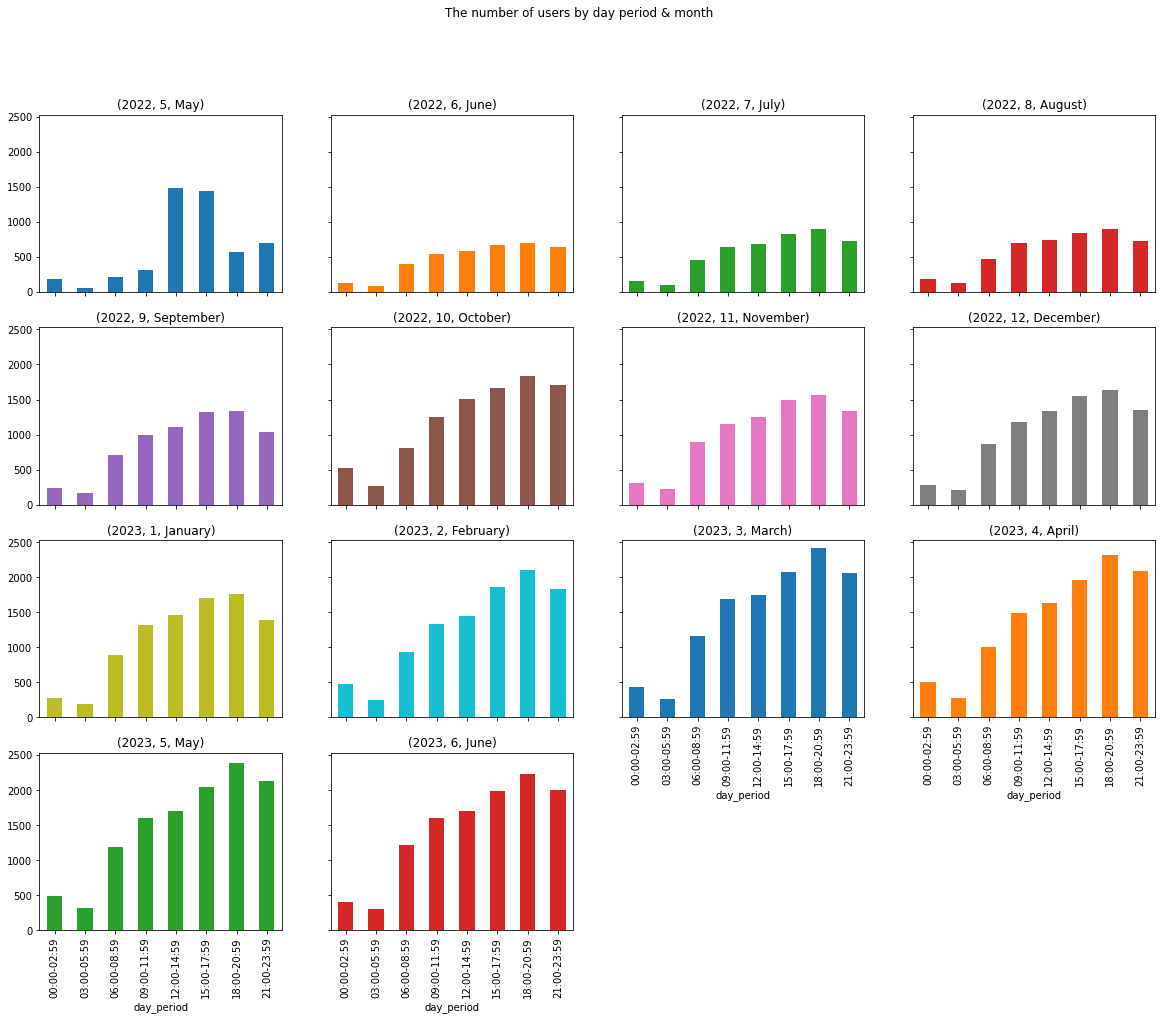

In [55]:
day_period_uniqMac_month_pivot.plot(kind='bar',subplots=True, layout=(4, 4), figsize=(20,15),sharex=True,sharey=True,legend=False,title='The number of users by day period & month')
plt.savefig('by_period_month_sub_plt.png');